In [ ]:
################################################################################################################################################
################################################################################################################################################
############################################# PROGRAM TO CREATE XGBOOST REGRESSION MODEL #######################################################
################################################################################################################################################
################################################################################################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
################################################ Read the Housing Data CSV file ##############################################################
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
                'DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

""" Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
 """
data_boston = pd.read_csv("../data/bostonhousingdata.csv", header=None, delimiter=r"\s+", names=column_names)
data_boston.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [3]:
##################################### Define Dependent and Independent Attributes ##########################################################
df = data_boston.drop(columns=["MEDV"])
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10


In [4]:
target = data_boston[["MEDV"]]
target.head(10)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [5]:
###################################################################################################################################
##################################### Model Evaluation on Training and Testing Data ###############################################
###################################################################################################################################

from sklearn.model_selection import train_test_split

############################ Split the data into test and training (15% as test data) #############################################
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.15, random_state=10)

In [6]:
print("Number of test samples :", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

Number of test samples : 76
Number of training samples: 430


In [7]:
###################################################################################################################################
######################################## Create XGBoost Regression Model ##########################################################
###################################################################################################################################
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

model = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=100, random_state=42)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [10]:
predictions_train = model.predict(x_train)

In [11]:
########################################### Model accuracy using Training Data ###################################################
from sklearn.metrics import mean_absolute_error

mse_train = mean_squared_error(y_train,predictions_train)
print("Mean square error is",mse_train)
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
mae_train = mean_absolute_error(y_train, predictions_train)
print(f"Mean Absolute Error (MAE): {mae_train}")
print("R-Square:", r2_score(y_train,predictions_train))

Mean square error is 0.00035556617424346024
Root Mean Squared Error (RMSE): 0.018856462400022447
Mean Absolute Error (MAE): 0.013071513508641476
R-Square: 0.9999953373695768


In [ ]:
###################################################################################################################################
############################### Review Parameter Tuning for the XGBoost Regression Model ##########################################
###################################################################################################################################

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'subsample': 0.8}


In [13]:
################################## Fit XGBoost Regression Model with best parameters ############################################
model_aftertuning =xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=100, random_state=42,
                            max_depth = grid_search.best_params_["max_depth"],
                           learning_rate  = grid_search.best_params_["learning_rate"],
                           subsample  = grid_search.best_params_["subsample"],
                           colsample_bytree = grid_search.best_params_["colsample_bytree"])

model_aftertuning.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [14]:
predictions_train_aftertuning = model_aftertuning.predict(x_train)

In [15]:
##################################### Model accuracy using Training Data - after tuning ##########################################
mse_train = mean_squared_error(y_train,predictions_train_aftertuning)
print("Mean square error is",mse_train)
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train_aftertuning))
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
mae_train = mean_absolute_error(y_train, predictions_train_aftertuning)
print(f"Mean Absolute Error (MAE): {mae_train}")
print("R-Square:", r2_score(y_train,predictions_train_aftertuning))

Mean square error is 0.8904007188694757
Root Mean Squared Error (RMSE): 0.94361046988123
Mean Absolute Error (MAE): 0.7350618351337521
R-Square: 0.9883239470417511


In [18]:
###################################################################################################################################
############################### Review Feature Importance of the XGBoost Regression Model #########################################
###################################################################################################################################

importance = model.get_booster().get_score(importance_type='weight')

importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
0,CRIM,790.0
5,RM,484.0
6,AGE,405.0
12,LSTAT,341.0
7,DIS,312.0
11,B,278.0
4,NOX,199.0
2,INDUS,127.0
10,PTRATIO,103.0
9,TAX,78.0


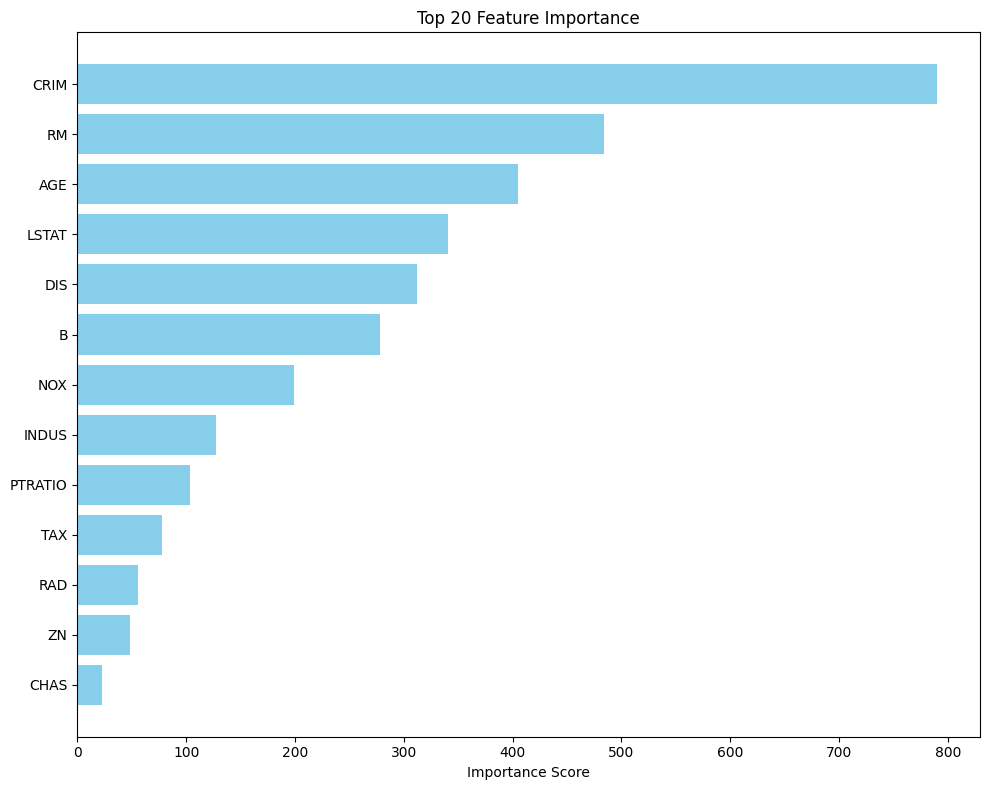

In [19]:
top_n = 20
plt.figure(figsize=(10, 8))
plt.barh(
    importance_df['Feature'].head(top_n)[::-1],
    importance_df['Importance'].head(top_n)[::-1],
    color='skyblue'
)
plt.xlabel('Importance Score')
plt.title(f'Top {top_n} Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
##################################################################################################################################
######################################## Prediction using Test Data ##############################################################
##################################################################################################################################
predictions_test = model.predict(x_test)
print(predictions_test[0:5])

[25.71439  29.878777 26.999683 27.76286  19.51115 ]


In [ ]:
########################################### Model accuracy using Test Data #######################################################
mse_test = mean_squared_error(y_test,predictions_test)
print("Mean square error is",mse_test)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
mae_test = mean_absolute_error(y_test, predictions_test)
print(f"Mean Absolute Error (MAE): {mae_test}")
print("R-Square value using test data is", r2_score(y_test,predictions_test))

Mean square error is 12.681711982515543
Root Mean Squared Error (RMSE): 3.561139141133851
Mean Absolute Error (MAE): 2.3898871622587503
R-Square value using test data is 0.8884458040617819
